<a href="https://colab.research.google.com/github/ubsuny/PHY386/blob/Homework2025/2025/HW/EODAngelo/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Upload Libraries

In [1]:
# Install required libraries
!pip install astropy scikit-learn tensorflow matplotlib numpy photutils auto-stretch astroquery pytest ipytest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00


## Task 1: Data Prep

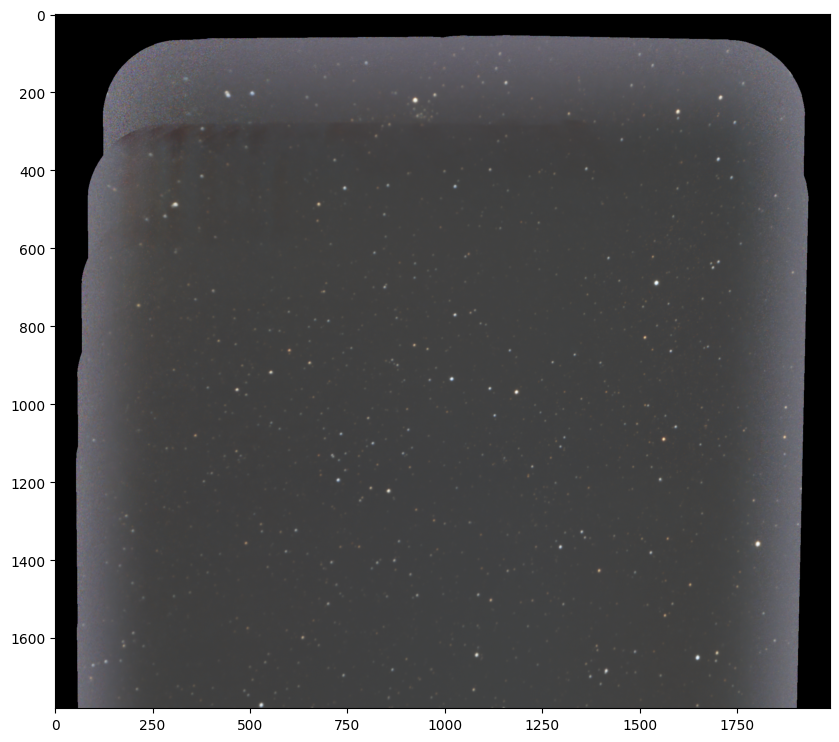

In [2]:
from astropy.io import fits
from auto_stretch import apply_stretch
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

fits_url = "https://github.com/ubsuny/PHY386/raw/refs/heads/main/data/3low.fits"
response = requests.get(fits_url)
response.raise_for_status()
fits_file = fits.open(BytesIO(response.content))

hdul = fits.open(BytesIO(response.content))
image_data = np.transpose(hdul[0].data, (1,2,0))

hdul.close()

fig = plt.figure(figsize=(10, 10))
plt.imshow(apply_stretch(image_data))

In [3]:
import pandas as pd
from astropy.wcs import WCS
from astropy.stats import mad_std
from photutils.detection import DAOStarFinder

bkg_sigma = mad_std(np.mean(image_data, axis=2))

daofind = DAOStarFinder(fwhm=3.0, threshold=bkg_sigma * 10, min_separation = 15)
sources = daofind(np.mean(image_data, axis=2))

catalog = sources.to_pandas().sort_values('flux', ascending=False).head(10)

catalog

,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag
170,171,1542.923326,689.091824,0.421826,-0.462434,0.164981,25,55435.333333,790753.000000,-14.745102,-5.578493
331,332,1803.293359,1358.945596,0.448332,-0.386707,0.133243,25,48755.666667,728219.000000,-14.655655,-5.319174
81,82,923.748779,219.360233,0.464721,-0.500671,0.015289,25,27249.000000,422838.666667,-14.065437,-4.644884
374,375,1648.666121,1651.278111,0.411471,-0.239897,0.280038,25,21071.666667,358756.333333,-13.886999,-4.195393
234,235,1183.809099,969.313074,0.480083,-0.441452,0.111403,25,24129.333333,321049.666667,-13.766431,-4.727653
91,92,1598.137473,249.223192,0.458131,-0.608191,0.150378,25,14875.333333,238559.333333,-13.443991,-3.930267
225,226,1017.726779,935.821352,0.401384,-0.387702,0.003738,25,13581.333333,228899.333333,-13.399111,-3.790386
393,394,528.690065,1772.416738,0.418988,-0.422589,0.137524,25,10627.000000,198655.000000,-13.245249,-3.190724
264,265,1561.674623,1090.360442,0.470576,-0.388441,0.151394,25,12601.000000,186834.000000,-13.178640,-3.880904
78,79,1707.822875,212.867241,0.450843,-0.672468,0.090743,25,10504.666667,184977.666667,-13.167798,-3.357227


In [4]:
wcs = WCS(hdul[0].header, naxis=2)
print(wcs)
sky_coords = wcs.all_pix2world(catalog['xcentroid'],catalog['ycentroid'],1)

catalog['ra'] = sky_coords[0]
catalog['dec'] = sky_coords[1]
catalog

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 25.8111625882977 63.5384206931328 
CRPIX : 995.0 1741.0 
PC1_1 PC1_2  : 0.999778549767352 0.0211508379531688 
PC2_1 PC2_2  : -0.0209811457152273 0.999777631225308 
CDELT : -0.00110883666158442 0.00111216032976206 
NAXIS : 1989  1781  3


,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,peak,flux,mag,daofind_mag,ra,dec
170,171,1542.923326,689.091824,0.421826,-0.462434,0.164981,25,55435.333333,790753.000000,-14.745102,-5.578493,24.555627,62.350518
331,332,1803.293359,1358.945596,0.448332,-0.386707,0.133243,25,48755.666667,728219.000000,-14.655655,-5.319174,23.851600,63.081230
81,82,923.748779,219.360233,0.464721,-0.500671,0.015289,25,27249.000000,422838.666667,-14.065437,-4.644884,26.054113,61.848428
374,375,1648.666121,1651.278111,0.411471,-0.239897,0.280038,25,21071.666667,358756.333333,-13.886999,-4.195393,24.196586,63.414300
234,235,1183.809099,969.313074,0.480083,-0.441452,0.111403,25,24129.333333,321049.666667,-13.766431,-4.727653,25.394648,62.675414
91,92,1598.137473,249.223192,0.458131,-0.608191,0.150378,25,14875.333333,238559.333333,-13.443991,-3.930267,24.468182,61.859550
225,226,1017.726779,935.821352,0.401384,-0.387702,0.003738,25,13581.333333,228899.333333,-13.399111,-3.790386,25.797431,62.642674
393,394,528.690065,1772.416738,0.418988,-0.422589,0.137524,25,10627.000000,198655.000000,-13.245249,-3.190724,26.971335,63.579554
264,265,1561.674623,1090.360442,0.470576,-0.388441,0.151394,25,12601.000000,186834.000000,-13.178640,-3.880904,24.470475,62.795406
78,79,1707.822875,212.867241,0.450843,-0.672468,0.090743,25,10504.666667,184977.666667,-13.167798,-3.357227,24.214667,61.813889


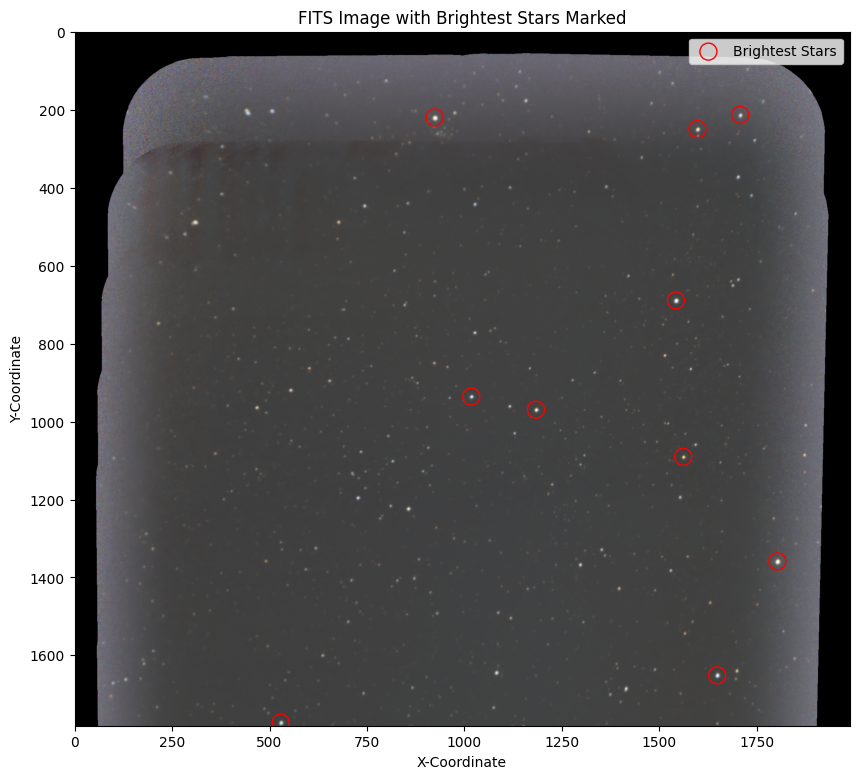

In [5]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(apply_stretch(image_data))

plt.scatter(catalog['xcentroid'],catalog['ycentroid'],color='red', marker='o', facecolors='none', s=150, label='Brightest Stars')

plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')
plt.title('FITS Image with Brightest Stars Marked')
plt.legend()

plt.show()

## Task 2: Star Properties

In [11]:
from astroquery.simbad import Simbad
import astropy.units as u
from astropy.coordinates import SkyCoord
from tqdm import tqdm

options = Simbad.list_votable_fields()

In [9]:
qu = Simbad()
qu.add_votable_fields('basic')

In [15]:
Simbad.ROW_LIMIT = 1
Simbad.reset_votable_fields()
Simbad.add_votable_fields("mesdistance", "V", "sp", "otype", "ids")

for idx, row in tqdm(catalog.iterrows(), total=catalog.shape[0]):
  ra, dec = row["ra"], row["dec"]
  coord = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)

  try:
    result = Simbad.query_region(coord, radius="50s")

    if result:
      catalog.at[idx, "star_name"] = result[0]["main_id"]
      catalog.at[idx, "spectral_type"] = result[0]["sp_type"]
      catalog.at[idx, "object_type"] = result[0]["otype"]
      catalog.at[idx, "visual_mag"] = result[0]["V"]

      dist = result[0]["mesdistance.dist"]
      catalog.at[idx, "Simbad_distance_pc"] = float(dist) if dist is not None else None

  except Exception as e:
    print(f"Error querying Simbad for {idx}: {e}")

 20%|██        | 2/10 [00:00<00:02,  2.86it/s]/usr/local/lib/python3.11/dist-packages/pandas/core/internals/base.py:363: UserWarning: Warning: converting a masked element to nan.
  arr[indexer] = value
<ipython-input-15-6cf733e9e498>:19: UserWarning: Warning: converting a masked element to nan.
  catalog.at[idx, "Simbad_distance_pc"] = float(dist) if dist is not None else None
100%|██████████| 10/10 [00:02<00:00,  4.55it/s]


## Task 3: Visualize and Label

In [14]:
import matplotlib.pyplot as plt

def make_patch(image, x, y, size = 64):
  x_min = int(np.clip(x - size/2, 0, image.shape[0]))
  x_max = int(np.clip(x + size/2, 0, image.shape[0]))
  y_min = int(np.clip(y - size/2, 0, image.shape[1]))
  y_max = int(np.clip(y + size/2, 0, image.shape[1]))

  return image[x_min:x_max, y_min:y_max]

plt.imshow(apply_stretch(make_patch(image_data,catalog['xcentroid'][0],catalog['ycentroid'][0])),cmap='gray')

KeyError: 0

## Task 4: Build a CNN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 4

model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Task 5: Train the Model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


def extract_spectral_class(s):
  """ simplify specral classes, e.g. M1 ---> M """
  if s is np.nan:
    return s
  return s[0]

catalog['simple_spectral_class'] = catalog['spectral_type'].apply(extract_spectral_class)
catalog.head()

IndexError: string index out of range

In [ ]:
le = LabelEncoder()
catalog['spectral_label'] = le.fit_transform(catalog['simple_spectral_class'])
catalog.head()

In [ ]:
patches = []
for _, row in catalog.iterrows():
  patch = make_patch(red_image, row['xcentroid'], row['ycentroid'])
  patches.append(patch)
X = np.array(patches)[..., np.newaxis]
y = catalog['spectral_label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)